# Airbnb in New York City - Impact of Neighborhoods

## Table of Contents
* [Introduction](#introduction)
    * [Background](#background)
    * [Problem and Interest](#pna)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
    * [Exploratory Data Analysis](#eda)
    * [Clustering with Nearby Venues](#cluster)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## 1. Introduction <a name="introduction"></a>


### 1.1 Background <a name="background"></a>

#### About Airbnb

> **"Millions of Airbnb Hosts connect curious people to an endlessly interesting world.**
> Guests can discover the perfect place to stay for every getaway and explore new experiences while traveling, or online. Hosts can list their extra space, receive hosting tips and support, and earn money while creating memorable moments for guests.**"**

*- This is how Airbnb describe themselves on the Google Playstore*

**Airbnb** is a platform provider for hosts and guests, where hosts can list their properties for the purpose of providing logding and homestay facilities, and guests can avail these said facilities. Founded in the year of 2008, in San Francisco, California - Airbnb has come a long way such that now they have a global presence for providing their one of a kind service.


### 1.2 Problem and Interest <a name="pna"></a>

The business model of Airbnb is that it facilitates the rental process of accommodations, lodgings and homestays by providing an online marketplace. The company does not own any of the properties in the listings, they just charge a commission for each of the bookings.

Thus one of the most important aspect would be to get an understanding of the locality of the properties and to see if and how it has any impact on its pricing or popularity.

This can be used for taking business decisions by getting an understanding of customers' and providers' behavior and performance on the platform as a result helping to guide marketing initiatives and maybe implementation of innovative additional services, etc.



## 2. Data <a name="data"></a>


So now we move on to the data we will be requiring and using for this analysis.

* We will be using the "New York City Airbnb Open Data" available on Kaggle. The link to the database is: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
* This dataset has around 49,000 entries with 16 columns. We will not be requiring all the columns and hence we will perform data cleaning and wrangling methods to simplify the data as per our requirement
* Let us now understand the data. The columns for the original dataset and their description are as follows:

| Columns                          | Description                                     |
|:---------------------------------|:------------------------------------------------| 
| `id`                             | id of the listing                               | 
| `name`                           | title of the listing                            |  
| `host_id`                        | id of the host who has listed                   | 
| `host_name`                      | name of the host who has listed                 |
| `neighbourhood_group`            | name of the borough                             |
| `neighbourhood`                  | name of the neighborhood                        |  
| `latitude`                       | location latitude of the listing                | 
| `longitude`                      | location longitude of the listing               |
| `room_type`                      | type of room / accomodation                     |
| `price`                          | price of the listing                            |
| `minimum_nights`                 | minimum number of nights to be booked for       |  
| `number_of_reviews`              | total number of reviews for the listing         | 
| `last_review`                    | date of the last review                         |
| `reviews_per_month`              | average reviews per month                       |
| `calculated_host_listings_count` | total no of listings by the host                |  
| `availability_365 `              | property available for number of days per year  | 

* We already have latitude and longitude data of the properties in the dataset which can be used for finding the nearby venues for these properties using the **Foursquare API** 


Let us load the database and do some basic data wrangling and cleaning

In [1]:
#importing the required libraries

#!pip install requests

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

print('Libraries successfully imported.')

Libraries successfully imported.


In [2]:
#loading the dataset into a pandas dataframe

airbnb_df = pd.read_csv("https://raw.githubusercontent.com/sarkar-kumardipta/Coursera_Capstone/main/AB_NYC_2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# let us see the size of the dataset

airbnb_df.shape

(48895, 16)


So there are 48,895 rows and 16 columns. Some of the columns contain numerical data while the others contain categorical data.

In [4]:
# let us see the datatypes of the dataframe

airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


For our analysis we can remove the data relating to the hosts as it will not be required. Hence we can drop the columns `host_id`, `host_name` and `calculated_host_listings_count`.

Also we can remove `last_review` column. 

In [5]:
# let us drop host_id, host_name, calculated_host_listings_count and last_review columns

airbnb_df.drop(['host_id','host_name','calculated_host_listings_count','last_review'], axis=1, inplace=True)

airbnb_df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


Now let us understand the rmining data using the `describe()` method.

In [6]:
# let us now use the describe() method to get a better understanding of the data

airbnb_df.describe(include = 'all')

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.889500e+04,48879,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
unique,NaN,47905,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Hillside Hotel,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,NaN,18,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN
mean,1.901714e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,1.373221,112.781327
std,1.098311e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,1.680442,131.622289
min,2.539000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,0.010000,0.000000
25%,9.471945e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,0.190000,0.000000
50%,1.967728e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,0.720000,45.000000
75%,2.915218e+07,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.020000,227.000000



From the `count` parameter we can see some of the values are less than 48,895. This means that some of the data must be null. Let us find out which ones are those.

In [7]:
# let us find the total number of null values per column

airbnb_df.isnull().sum()

id                         0
name                      16
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

So we can see that there are 16 null entries in the `name` column and 10,052 null entries in the `reviews_per_month` column.

How should we deal with these?

We can drop the rows where the `name` is null.

And for `reviews_per_month`, we can replace the empty values with 0 as logically empty `reviews_per_month` means no reviews have been given and hence 0 should suffice.

In [8]:
# let us drop the entries with empty name value

airbnb_df.dropna(subset = ["name"], inplace=True)

# Let us replace the empty 'reviews_per_month' with 0

airbnb_df.fillna({'reviews_per_month':0}, inplace=True)

airbnb_df.reset_index()

airbnb_df.isnull().sum()

id                     0
name                   0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64


Also we can observe from the previous outputs, in the `availability_365` some of the values are 0.

So the properties which are never available throughout the year will create noise for our model, hence it is better to get rid of them.

So we will remove the entries with `availability_365` having value of 0

In [9]:
# Let us see how many 'availability_365' values are 0.

len(airbnb_df.loc[airbnb_df["availability_365"] == 0])

17521

In [10]:
# Let us drop these rows

airbnb_df = airbnb_df[airbnb_df.availability_365 > 0]

print("The dataframe has {} rows and {} columns.".format(airbnb_df.shape[0],airbnb_df.shape[1]))

airbnb_df.head()

The dataframe has 31358 rows and 12 columns.


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,129



Now the finishing step for our data preparation process. 

Here `price` is our dependant variable and rest other parameters are independant variables. Hence we will move the `price` column to the last column for easier visualization and understanding.

Also we will drop the `id` column as it will also not be required for the analysis.

Let us also rename the `neighbourhood_group` column as `borough`.

In [11]:
# let us drop the id column

airbnb_df.drop(['id'], axis=1, inplace=True)

# Moving price column to the last

airbnb_df = airbnb_df[['name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month',
                     'availability_365','price']]

# Renameing 'neighborhood_group' to borough

airbnb_df.rename(columns={'neighbourhood_group': 'borough'}, inplace=True)

# The prepped dataset
airbnb_df.head()

,name,borough,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,365,149
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,355,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,365,150
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,194,89
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,0.59,129,200




## 3. Methodology <a name="methodology"></a>


Now that we have the cleaned data we can start with our analysis.

So our methodology for the analysis will be as follows:

* As we already mentioned, for our analysis *price* will be the dependant variable and we will try the understand how the other variables are affecting it. We will conduct Exploratory Data Analysis to understands the relationships and trends.

* In our dataset we have the location *latitudes* and *longitudes* for each of the properties. Using the **Foursquare API** we will find the venues nearby to each of the properties and form clusters by using **Kmeans Clustering**. Once we have the cluster labels, we will analyse the *price* trends for each of the cluster and try to observe if there is any relationship or trend.



## 4. Analysis <a name="analysis"></a>


### 4.1 Exploratory Data Analysis <a name="eda"></a>

In [12]:
# Let us use the describe() method on the cleaned data

airbnb_df.describe(include = 'all')

,name,borough,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
count,31358,31358,31358,31358.000000,31358.000000,31358,31358.000000,31358.000000,31358.000000,31358.000000,31358.000000
unique,30885,5,218,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,Hillside Hotel,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,18,13557,2482,NaN,NaN,16531,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,40.728399,-73.948744,NaN,8.307673,31.855444,1.509769,175.808821,162.046272
std,NaN,NaN,NaN,0.056559,0.051397,NaN,23.170982,51.639209,1.781310,126.178954,254.437200
min,NaN,NaN,NaN,40.499790,-74.244420,NaN,1.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,40.688383,-73.983270,NaN,2.000000,2.000000,0.170000,55.000000,70.000000
50%,NaN,NaN,NaN,40.723720,-73.954110,NaN,3.000000,10.000000,0.920000,167.000000,111.000000
75%,NaN,NaN,NaN,40.763030,-73.930140,NaN,5.000000,39.000000,2.340000,305.000000,189.000000



#### Boroughs

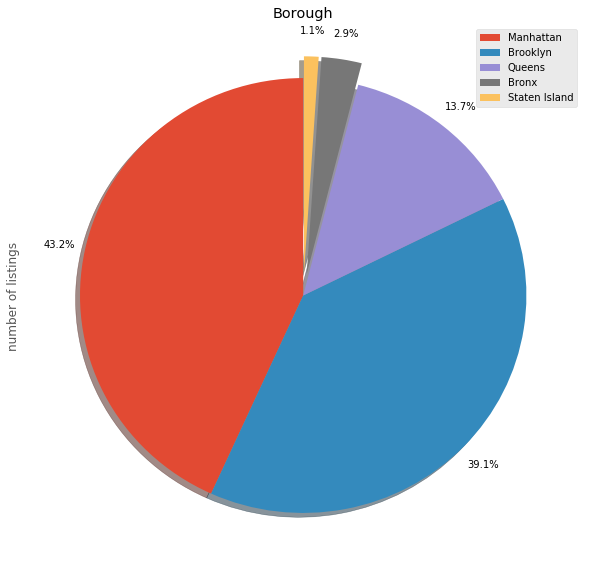

,number of listings
Manhattan,13557
Brooklyn,12259
Queens,4298
Bronx,913
Staten Island,331


In [13]:
# Now let us see how many properties are lsited per borough

mpl.style.use('ggplot')
explode_list = [0, 0, 0, 0.1, 0.1]

airbnb_borough_vc = airbnb_df['borough'].value_counts().to_frame()

airbnb_borough_vc.rename(columns={'borough': 'number of listings'}, inplace=True)

airbnb_borough_vc['number of listings'].plot(kind='pie',
                              labels=None,
                              autopct='%1.1f%%',
                              startangle=90,
                                figsize=(10,10),
                              pctdistance=1.12,
                              explode=explode_list,
                              shadow=True)

plt.title('Borough')
#plt.figure(figsize=(5,5))
plt.legend(labels=airbnb_borough_vc.index, loc=0) 

plt.show()

airbnb_borough_vc


There are 5 boroughs in the City of New York, which is also evident from the table. As above we can see a pie chart and a table showing the distribution ob listings per borough.

We would have assumed *Manhattan* and *Brooklyn* to have higher listings compared to the other boroughs as these two are comparatively busier and more crowded than the rest. And now we can see that our data also reflects the same. 

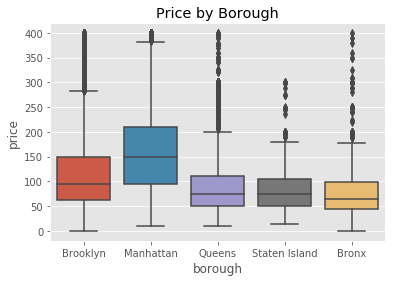

In [14]:
# Let us now use boxplots to see the distribution of price for each of the boroughs

box = sns.boxplot(x='borough',y='price',
                   data=airbnb_df[airbnb_df.price<400]).set(title='Price by Borough')

Again as we can see from the above boxplot, the mean price is higher in the more popular boroughs of *Brooklyn* and *Manhattan*. This is also expected.


#### Neighborhoods

In [15]:
# Let us view the locations of the listings color coded as per average listing price per neighborhood 

#!conda install -c conda-forge geopy --yes
#!pip install geopy
#!pip install folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

address = 'New York, US'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

aribnb_df_ng = airbnb_df[['neighbourhood','latitude','longitude',
                          'price']].groupby(['neighbourhood'],as_index=False).mean()

aribnb_df_ng.sort_values(by=['price'], ascending=False, inplace =True)
aribnb_df_ng = aribnb_df_ng.reset_index(drop=True)
aribnb_df_ng.reset_index(level=0, inplace=True)

#aribnb_df_ng

x = np.arange(len(aribnb_df_ng))
ys = [i + x + (i*x)**2 for i in range(len(aribnb_df_ng))]
colors_array = cm.autumn(np.linspace(0, 1, len(ys)))
autumn = [colors.rgb2hex(i) for i in colors_array]

map_ny = folium.Map(location=[latitude, longitude], tiles = 'Stamen Terrain', zoom_start=10)

markers_colors = []
for lat, lon, poi, index, price in zip(aribnb_df_ng['latitude'], aribnb_df_ng['longitude'], aribnb_df_ng['neighbourhood'], aribnb_df_ng['index'], aribnb_df_ng['price']):
    label = folium.Popup('Neighborhood: ' + str(poi) + ' Average Price: ' + str(round(price,2)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=autumn[index-1],
        fill=True,
        fill_color=autumn[index-1],
        fill_opacity=0.7).add_to(map_ny)
       
map_ny

![Map3](https://user-images.githubusercontent.com/83448048/122063515-f7124b00-ce0d-11eb-8c0d-86f7d4b99730.png)

The above Folium Map of New York shows us the markers per neighborhood, color coded with respect to average price of listings from highest to lowest. Here, the color gradient is red to yellow, where red shows the higest value and yellow shows the least.

As we can see from the above map, the listings for the neighborhoods of Manhattan are concentrated in red. This shows that the prices are comparatively higher for the properties in Manhattan. This also goes in line with the fact that in real life the Manhattan area is more high cost comapred to other areas of New York.

Similarly, average prices are lower in the neighborhoods of Bronx and Staten Island as can be seen from the map markers. This is also as per expectation.


#### Room Type

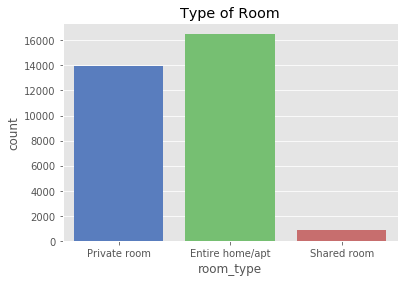

In [16]:
# Let us see the number of properties per room type

plt.title("Type of Room")
sns.countplot(airbnb_df.room_type, palette="muted")
#box_rt = sns.boxplot(x='room_type',y='price',orient="h",data=airbnb_df).set(title='Price by Borough')
fig = plt.gcf()
plt.show()

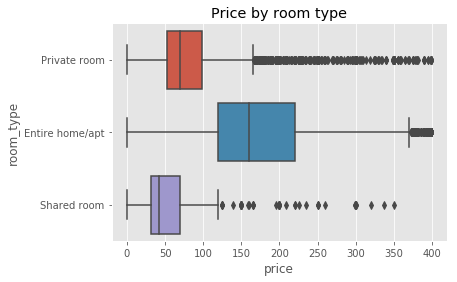

In [17]:
# Let us see the price distribution per room type

box_rt = sns.boxplot(x='price',y='room_type',data=airbnb_df[airbnb_df.price<400]).set(title='Price by room type')


From the above figure we can see that the number of listings with shared room as room type is considerably much lesser than the listings for room types of private room or entire home/apartment. This can be due to the fact that people prefer to stay with privacy rather than staying in a shared setup in general, and this is also reflected by the listings as shown in the coutplot.

Also we have made a boxplots comparing the price and the roomtypes. Here also we can observe that the price range and median price of entire home/apartment is also much higher than that of both private or shared rooms, which is also very obvious. 


#### Minimum nights

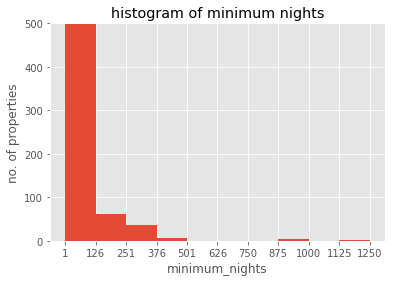

In [18]:
# Let us make a histogram for minimum nights

airbnb_df_tmn = airbnb_df["minimum_nights"].transpose()

count, bin_edges = np.histogram(airbnb_df_tmn,10)

airbnb_df_tmn.plot(kind="hist", xticks = bin_edges)

plt.ylim(0,500)
plt.xlabel('minimum_nights')
plt.ylabel('no. of properties')
plt.title("histogram of minimum nights")
plt.show()

As we can see in the above figure, the highest number of properties are listed for a minimum nights of 1 - 126. The values for the number of properties in the first bin was very high (more than 30000 in this case) so we have put a limit till 500 for better visualization.

So this result is also as per expectation. This is because the model of Airbnb is to rent the properties for short term basis most of the times.

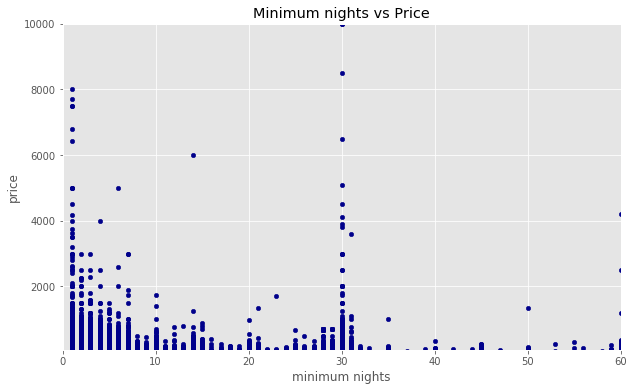

In [19]:
# Let us compare the price with minimum nights

airbnb_df.plot(kind='scatter', x='minimum_nights', y='price', figsize=(10, 6), color='darkblue')

plt.title('Minimum nights vs Price')
plt.xlim(0,airbnb_df["minimum_nights"].quantile(0.99))
plt.ylim(airbnb_df["price"].quantile(0.25),airbnb_df["price"].max())
plt.xlabel('minimum nights')
plt.ylabel('price')

plt.show()

As per the above figure we can see that there is not much correlation between the price and minimum nights.

But we can observe one trend that is the most variance in price for minimum nights is in the case of minimum nights equal to 1 and 30. This means that these are the most popular bookings for minimum nights, thus having most varied types of options starting from lowest prices to prices as high as 10000.


#### Availability 365


The analysis we did for `minimum_nights`, we can do a similar analysis `availability_365`.

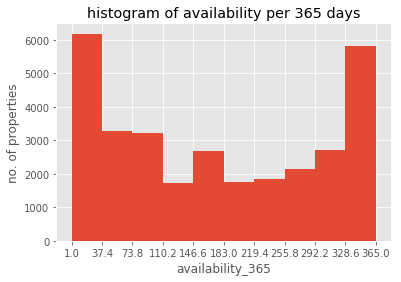

<Figure size 1080x504 with 0 Axes>

In [20]:
# Let us make a histogram for avaiability_365

airbnb_df_tav = airbnb_df["availability_365"].transpose()

count_av, bin_edges_av = np.histogram(airbnb_df_tav,10)

airbnb_df_tav.plot(kind="hist", xticks = bin_edges_av)

#plt.ylim(0,500)
plt.xlabel('availability_365')
plt.ylabel('no. of properties')
plt.title("histogram of availability per 365 days")
plt.figure(figsize=(15,7))
plt.show()

From the above plot, we can see that the number of preperties available for number of days per year show extreme polarities. Either it is available almost throughout the year or it is available for only a day or a week maybe.

This behaviour can be explained by understanding the offerings of Airbnb. Just as Airbnb offers regular spaces for lodging and homestaying, they also have certain exclusive destination themed properties. Hence the availability of the exclusive properties maybe for a very limited time like say for a day or for a week maybe, whereas the regular lodging options maybe available throughout the year.

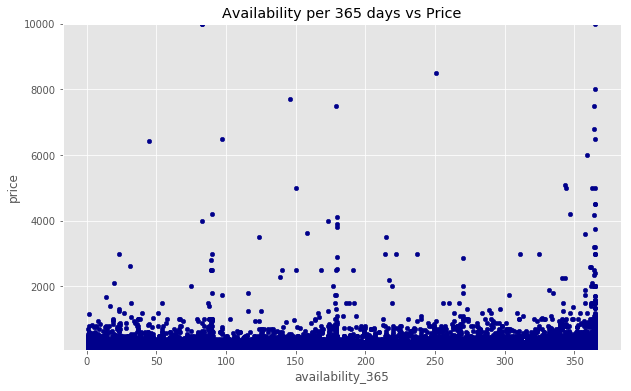

In [21]:
# Let us compare the price with minimum nights

airbnb_df.plot(kind='scatter', x='availability_365', y='price', figsize=(10, 6), color='darkblue')

plt.title('Availability per 365 days vs Price')
#plt.xlim(0,airbnb_df["minimum_nights"].quantile(0.99))
plt.ylim(airbnb_df["price"].quantile(0.25),airbnb_df["price"].max())
plt.xlabel('availability_365')
plt.ylabel('price')

plt.show()

Prices do not show much correlation with availability per 365 days.


#### Number of Reviews & Reviews per Month

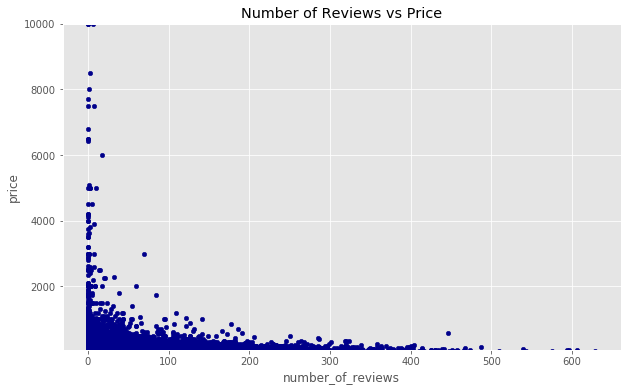

In [22]:
# Let us compare the price with number of reviews

airbnb_df.plot(kind='scatter', x='number_of_reviews', y='price', figsize=(10, 6), color='darkblue')

plt.title('Number of Reviews vs Price')
#plt.xlim(0,airbnb_df["number_of_reviews"].quantile(0.95))
plt.ylim(airbnb_df["price"].quantile(0.25),airbnb_df["price"].max())
plt.xlabel('number_of_reviews')
plt.ylabel('price')

plt.show()

Comparing price with number of reviews we do not see much correlation.

But one conclusion we can draw from here that is the high priced properties have less reviews. This maybe due to the fact they maynot be in everyone's budget and hence only few people may have availed  these properties and so the number of reviews are also less.

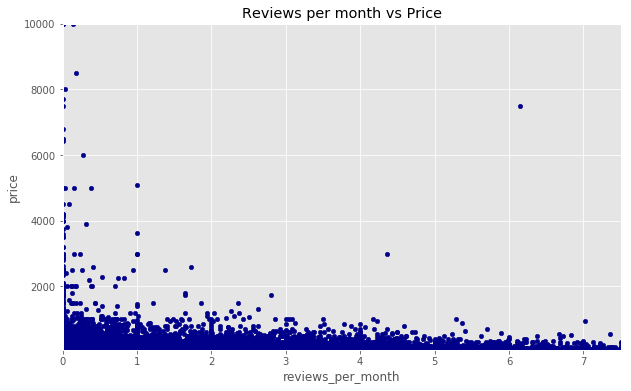

In [23]:
# Let us compare the price with reviews per month

airbnb_df.plot(kind='scatter', x='reviews_per_month', y='price', figsize=(10, 6), color='darkblue')

plt.title('Reviews per month vs Price')
plt.xlim(0,airbnb_df["reviews_per_month"].quantile(0.99))
plt.ylim(airbnb_df["price"].quantile(0.25),airbnb_df["price"].max())
plt.xlabel('reviews_per_month')
plt.ylabel('price')

plt.show()


Reviews per month also shows a similar trend to that of number of reviews.

No distinct correlation observed.


#### Name

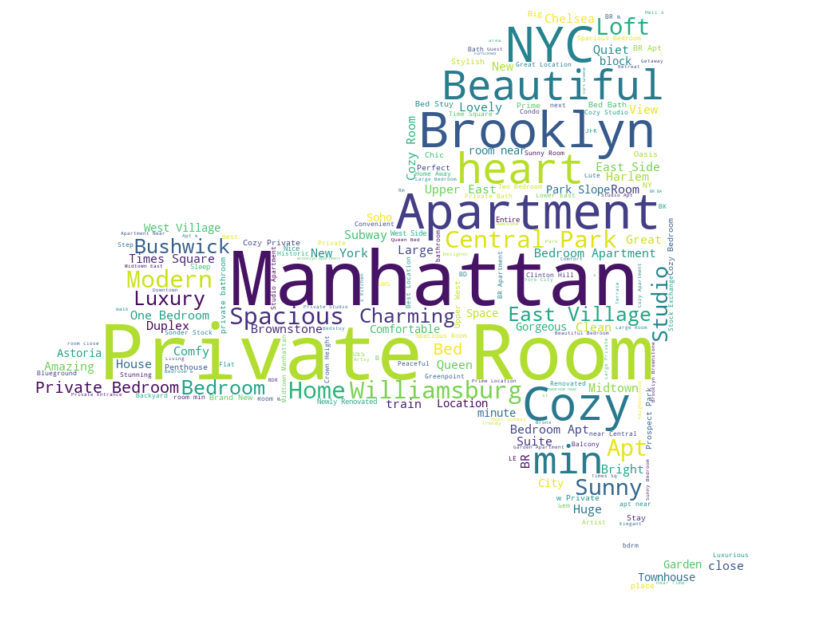

In [24]:
# Let us now find out the most common words under names of the preperties

#!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib.request
import string

name_str = ""

urllib.request.urlretrieve('https://user-images.githubusercontent.com/83448048/121839529-e7a0de00-ccf7-11eb-9bc3-20e3909615e5.png',"nybw.png")

for name in airbnb_df.name:
    name_str = name_str + " " + name
    
name_str_wp = str.maketrans(string.punctuation + string.digits, ' '*len(string.punctuation + string.digits))
new_name_str = ' '.join(name_str.translate(name_str_wp).split())

stopwords = set(STOPWORDS)
ny_mask = np.array(Image.open('nybw.png'))

name_wc = WordCloud(
    background_color='white',
    mask = ny_mask,
    stopwords=stopwords
)

name_wc.generate(new_name_str)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(name_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Wow ths is quite an interesting visual!**

We have plotted the WordCloud of all the words present in names of the listed properties and we have superimposed it on a map of New York.

As we can see from the WordCloud, analysizing all the names of the listed properties the most common words are *Manhattan*, *Private* and *Room*.

This shows that the most common listings are for **_Private Rooms in Manhattan_**, which was also obvious from our previous analysis. This is really great! 


### 4.2 Clustering with Nearby Venues <a name="cluster"></a>

In this section, we will use the the latitudinal and longitudinal data of each of the properties and utilizing the *Foursquare API* we will find the top 10 nearby venues for each of the properties.

Once we have the top 10 nearby venues we will use *KMeans clustering* to seperate the properties in cluster based on inter-cluster similarity and intra-cluster dissimilarity.

Once the clusters are formed we will analyze their clustering trend and try to understand if the clusters have any relationship with price.

**Foursquare API**
> The Foursquare Places API is a geolocating and geotagging API service provided by Foursquare. This API provides location based experiences with diverse information about venues, users, photos, and check-ins and all these are provided on real-time basis.

**KMeans Clustering**
> KMeans Clustering method is a simple clustering method which is very useful for processing unlabled data. The main concept behind clustering is segregating data into clusters based on parameters by maximizing the inter-cluster similarity and intra-cluster dissimilarity.

In [25]:
# Let us define the getNearbyVenues function
# It takes the fields neighborhood name, latitude, longitude and search radius as its arguments 
# and returns the nearby_venues dataframe

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    i = 0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        i = i+1
        print(i)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['name', 
                  'Property Latitude', 
                  'Property Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
# Credentials

CLIENT_ID = 'YYZUTUOAHZCE053T0MF24UC1N0Q4OTWXZ4XQH40ICCPBIIVJ' 
CLIENT_SECRET = 'J0A1PL1U4RVFVJOZHARQOSQPIKUBMAKSTHAL31SGLTEQZ24Q' 
VERSION = '20190812'
LIMIT = 600

The version of Fouraquare API that we will be using is the Personal version and has a limit of 99500 api calls per day. If we use the entire dataset then we may risk using up all our available api calls.

Hence let us use the nearby venue clustering only for the properties in the borough of Manhattan.

In [27]:
# Let us get the listings for the borough of Manhattan

airbnb_manhattan_df = airbnb_df[airbnb_df['borough'] == "Manhattan"].reset_index(drop=True)

print("There are a total of {} datapoints for Manhattan.".format(airbnb_manhattan_df.shape[0]))

airbnb_manhattan_df.head()

There are a total of 13557 datapoints for Manhattan.


,name,borough,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,355,225
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,365,150
2,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,0.59,129,200
3,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,2,430,3.47,220,79
4,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1,160,1.33,188,150


This is also very high, so let us create a sample of 500 rows from the `airbnb_manhattan_df`

In [28]:
airbnb_manhattan_sample_df = airbnb_manhattan_df.sample(n=500, random_state = 15).reset_index(drop = True)

airbnb_manhattan_sample_df.head()

,name,borough,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
0,MURRAY HILL LUXURY 2 BEDROOMS,Manhattan,Murray Hill,40.74833,-73.97253,Entire home/apt,30,0,0.00,336,280
1,Fabulous 3BR/3BA NoMad Midtown LOFT,Manhattan,Midtown,40.74615,-73.98872,Entire home/apt,3,13,4.59,84,800
2,Your New York Penthouse,Manhattan,NoHo,40.72870,-73.99184,Entire home/apt,1,0,0.00,364,225
3,Chelsea Chic,Manhattan,Chelsea,40.75013,-74.00330,Entire home/apt,1,75,1.61,331,215
4,Oasis in Harlem,Manhattan,Harlem,40.81321,-73.94556,Entire home/apt,4,16,0.65,12,150


Now let us find the nearby venues for the properties in Manhattan using the `getNearbyVenues` function.

In [29]:
# Getting the nearby venues

airbnb_manhattan_nv_df = getNearbyVenues(names=airbnb_manhattan_sample_df['name'],
                                   latitudes=airbnb_manhattan_sample_df['latitude'],
                                   longitudes=airbnb_manhattan_sample_df['longitude']
                                  )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [30]:
# One hot encoding the nearby venues per property

airbnb_manhattan_nv_onehot = pd.get_dummies(airbnb_manhattan_nv_df[['Venue Category']], prefix="", prefix_sep="")

airbnb_manhattan_nv_onehot['name'] = airbnb_manhattan_nv_df['name'] 


fixed_columns = [airbnb_manhattan_nv_onehot.columns[-1]] + list(airbnb_manhattan_nv_onehot.columns[:-1])
airbnb_manhattan_nv_onehot = airbnb_manhattan_nv_onehot[fixed_columns]

airbnb_manhattan_nv_onehot.head()

,name,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,...,Watch Shop,Waterfall,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,MURRAY HILL LUXURY 2 BEDROOMS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MURRAY HILL LUXURY 2 BEDROOMS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MURRAY HILL LUXURY 2 BEDROOMS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MURRAY HILL LUXURY 2 BEDROOMS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MURRAY HILL LUXURY 2 BEDROOMS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Grouping by mean

airbnb_manhattan_nv_grouped = airbnb_manhattan_nv_onehot.groupby('name').mean().reset_index()

airbnb_manhattan_nv_grouped.head()

,name,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,...,Watch Shop,Waterfall,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"""The Green Room"": Harlem Brownstone",0.0,0.0,0.0,0.016667,0.033333,0.000000,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,"""Treehouse"" in the East Village with Private P...",0.0,0.0,0.0,0.000000,0.010000,0.000000,0.0,0.01,0.01,...,0.0,0.0,0.0,0.0,0.0,0.050000,0.010000,0.000000,0.0,0.0
2,(UES) Entire Apartment Near Central Park,0.0,0.0,0.0,0.000000,0.000000,0.011111,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.011111,0.033333,0.011111,0.0,0.0
3,*NO GUEST SERVICE FEE* Beekman Tower One Bedro...,0.0,0.0,0.0,0.000000,0.032258,0.000000,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.016129,0.000000,0.000000,0.0,0.0
4,*NO GUEST SERVICE FEE* Beekman Tower Studio Su...,0.0,0.0,0.0,0.000000,0.037500,0.000000,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.012500,0.000000,0.000000,0.0,0.0


In [32]:
# Finding the most common venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = airbnb_manhattan_nv_grouped['name']

for ind in np.arange(airbnb_manhattan_nv_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(airbnb_manhattan_nv_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"""The Green Room"": Harlem Brownstone",Coffee Shop,Café,Pizza Place,Sandwich Place,Donut Shop,Bus Station,Bank,Bar,Pharmacy,Deli / Bodega
1,"""Treehouse"" in the East Village with Private P...",Wine Bar,Vegetarian / Vegan Restaurant,Korean Restaurant,Ice Cream Shop,Pizza Place,Bar,Vietnamese Restaurant,Cocktail Bar,Coffee Shop,Japanese Restaurant
2,(UES) Entire Apartment Near Central Park,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Gym,Coffee Shop,Deli / Bodega,Wine Shop,Gym / Fitness Center,Thai Restaurant,Dessert Shop
3,*NO GUEST SERVICE FEE* Beekman Tower One Bedro...,French Restaurant,Italian Restaurant,Bakery,Bar,Sushi Restaurant,Gym / Fitness Center,Coffee Shop,Plaza,American Restaurant,Thai Restaurant
4,*NO GUEST SERVICE FEE* Beekman Tower Studio Su...,French Restaurant,Thai Restaurant,Coffee Shop,Bar,American Restaurant,Bakery,Italian Restaurant,Japanese Restaurant,Rental Car Location,Sushi Restaurant


In [33]:
# KMeans Clustering

from sklearn.cluster import KMeans

kclusters = 5

manhattan_grouped_clustering = airbnb_manhattan_nv_grouped.drop('name', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

#kmeans.labels_[0:10] 

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = airbnb_manhattan_sample_df

manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

manhattan_merged.head()

,name,borough,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MURRAY HILL LUXURY 2 BEDROOMS,Manhattan,Murray Hill,40.74833,-73.97253,Entire home/apt,30,0,0.00,336,...,Coffee Shop,Deli / Bodega,Japanese Restaurant,Park,Sushi Restaurant,Thai Restaurant,Bank,Grocery Store,Steakhouse,Café
1,Fabulous 3BR/3BA NoMad Midtown LOFT,Manhattan,Midtown,40.74615,-73.98872,Entire home/apt,3,13,4.59,84,...,Korean Restaurant,Hotel,Gym / Fitness Center,Japanese Restaurant,Hotel Bar,Dessert Shop,Café,Bakery,Coffee Shop,Pizza Place
2,Your New York Penthouse,Manhattan,NoHo,40.72870,-73.99184,Entire home/apt,1,0,0.00,364,...,Italian Restaurant,Spa,Sushi Restaurant,Japanese Restaurant,Coffee Shop,Wine Shop,Pet Store,Bookstore,Grocery Store,Salad Place
3,Chelsea Chic,Manhattan,Chelsea,40.75013,-74.00330,Entire home/apt,1,75,1.61,331,...,Art Gallery,Coffee Shop,Park,Gym / Fitness Center,Playground,Wine Shop,Bookstore,Café,Cocktail Bar,Performing Arts Venue
4,Oasis in Harlem,Manhattan,Harlem,40.81321,-73.94556,Entire home/apt,4,16,0.65,12,...,African Restaurant,French Restaurant,Pizza Place,Sandwich Place,Gym,Seafood Restaurant,Juice Bar,Bar,Movie Theater,Coffee Shop


In [34]:
# Plotting the clusters

import branca

legend_html = '''
{% macro html(this, kwargs) %}
<div style="
    position: fixed; 
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: 140px;
    z-index:9999;
    font-size:10px;
    ">
    <p><a style="color:#f0f921;font-size:200%;margin-left:20px;">&bull;</a>&emsp;Cluster 1<br>
    <a style="color:#0d0887;font-size:200%;margin-left:20px;">&bull;</a>&emsp;Cluster 2<br>
    <a style="color:#7e03a8;font-size:200%;margin-left:20px;">&bull;</a>&emsp;Cluster 3<br>
    <a style="color:#cc4778;font-size:200%;margin-left:20px;">&bull;</a>&emsp;Cluster 4<br>
    <a style="color:#f89540;font-size:200%;margin-left:20px;">&bull;</a>&emsp;Cluster 5</p>
</div>
<div style="
    position: fixed; 
    bottom: 50px;
    left: 50px;
    width: 100px;
    height: 140px; 
    z-index:9998;
    font-size:14px;
    background-color: #ffffff;
    opacity: 0.7;
    ">
</div>
{% endmacro %}
'''

legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)

address_manhattan = 'Manhattan, New York'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address_manhattan)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], tiles = 'Stamen Terrain', zoom_start=12)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.plasma(np.linspace(0, 1, len(ys)))
plasma = [colors.rgb2hex(i) for i in colors_array]
#print(plasma)

markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['latitude'], manhattan_merged['longitude'], manhattan_merged['name'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=plasma[cluster-1],
        fill=True,
        fill_color=plasma[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
#folium.LayerControl().add_to(map_clusters)
map_clusters.get_root().add_child(legend)
       
map_clusters

![Map4](https://user-images.githubusercontent.com/83448048/122063639-10b39280-ce0e-11eb-87ba-0839d22d3644.png)


From The above map visualization we can see the the properties distributed to 5 clusters and each of the properties being shown on the map using markers of corresponding color.

Locationally we can observe a segregation among the clusters. Let us now analyze the nearby values and try to understand the basis of the clusters.


**1st Cluster**

As we can observe from the below table, the first cluster has Asian restaurants mostly in the nearby venues. This means that these particular properties will be convenient from people travelling from Asia or of Asian decent.

As we will be able to see later from the `Average price and Count per cluster` lineplot, this is a very nicche category hence very few properties fall in this cluster. Hence the number of properties aligning with this cluster is also less. Moreover, since these properties will attract mostly tourists the aveerage price is also comparatively higher.

In [35]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0,
                     manhattan_merged.columns[[0]+list(range(12, manhattan_merged.shape[1]))+[10]]].head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,price
1,Fabulous 3BR/3BA NoMad Midtown LOFT,Korean Restaurant,Hotel,Gym / Fitness Center,Japanese Restaurant,Hotel Bar,Dessert Shop,Café,Bakery,Coffee Shop,Pizza Place,800
8,Elegant Studio-Loft in Flatiron / NoMad,Korean Restaurant,Hotel,Gym / Fitness Center,Indian Restaurant,American Restaurant,Pizza Place,New American Restaurant,Italian Restaurant,Spa,Vegetarian / Vegan Restaurant,210
26,Prime 1 bedroom Doorman Gym RoofDeck 5221,Korean Restaurant,Hotel,Bakery,Coffee Shop,Gym / Fitness Center,Japanese Restaurant,Hotel Bar,Sushi Restaurant,Dessert Shop,Salad Place,260
32,"East 29th Street, Luxury 1bd in NOMAD",Korean Restaurant,Gym / Fitness Center,Hotel,Spa,Japanese Restaurant,Food Truck,Pizza Place,Bakery,American Restaurant,Dessert Shop,219
55,Gilded Age Bohemia,Indian Restaurant,Korean Restaurant,Gym / Fitness Center,Hotel,American Restaurant,Ice Cream Shop,Juice Bar,Spa,Pizza Place,Italian Restaurant,185



**2nd Cluster**

In the second cluster we observe that the nearby joints are mostly eateries or social spots. This means these properties will be in busy commercial areas and will attract most people who are travelling for business purpose and would require temporary accomodation.

It can be expected that this category will attract the most number of guests and hence we can observed from the `Average price and Count per cluster` lineplot that most of the properties fall under this cluster and the pricing is also moderate.

In [36]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1,
                     manhattan_merged.columns[[0]+list(range(12,manhattan_merged.shape[1]))+[10]]].head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,price
0,MURRAY HILL LUXURY 2 BEDROOMS,Coffee Shop,Deli / Bodega,Japanese Restaurant,Park,Sushi Restaurant,Thai Restaurant,Bank,Grocery Store,Steakhouse,Café,280
4,Oasis in Harlem,African Restaurant,French Restaurant,Pizza Place,Sandwich Place,Gym,Seafood Restaurant,Juice Bar,Bar,Movie Theater,Coffee Shop,150
5,Large luxury apartment. NYC,Southern / Soul Food Restaurant,Deli / Bodega,Fried Chicken Joint,American Restaurant,Sandwich Place,Coffee Shop,Bar,Dog Run,Lounge,Historic Site,280
9,3 bedroom duplex next to Central Pk,Deli / Bodega,Pizza Place,Bar,Mexican Restaurant,Coffee Shop,Yoga Studio,Japanese Restaurant,Grocery Store,Liquor Store,Ethiopian Restaurant,275
14,An Upper-Manhattan room of your own!,Pizza Place,Donut Shop,Mexican Restaurant,Bar,Chinese Restaurant,Sandwich Place,Deli / Bodega,Grocery Store,Latin American Restaurant,Mobile Phone Shop,51



**3rd Cluster**

The third cluster shows mostly Theatres and social hangouts spots as nearby vebues. Hence these properties will likely attract more liesurely and recreational people.

The `Average price and Count per cluster` lineplot will show us that the number of properties in this cluster is not very high but the price is moderate.

In [37]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2,
                     manhattan_merged.columns[[0]+list(range(12,manhattan_merged.shape[1]))+[10]]].head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,price
12,MONTHLY* CENTRAL PARK 3 BED/2 BATH LINCOLN SQU...,Theater,Plaza,Italian Restaurant,American Restaurant,Concert Hall,Gym / Fitness Center,Café,Park,Coffee Shop,Indie Movie Theater,370
43,"Convenient and Modern BR in Hell's Kitchen, NYC!",Gym / Fitness Center,Theater,American Restaurant,Hotel,Coffee Shop,Restaurant,Cosmetics Shop,Furniture / Home Store,Sandwich Place,Dessert Shop,70
44,Lux 1-BR Apt near Port Authority/Times Square,Coffee Shop,Sandwich Place,Gym,Spa,Theater,Italian Restaurant,American Restaurant,Bar,Gym / Fitness Center,Hotel Bar,239
48,Up to 4 people-Only steps away from Times Squa...,Theater,Hotel,Bakery,Plaza,Pizza Place,Gym,Taco Place,Sushi Restaurant,Food Truck,Coffee Shop,379
52,LUXURY 3 BR WITH DOORMAN~1600 BROADWAY,Theater,Hotel,Steakhouse,Plaza,Sushi Restaurant,American Restaurant,Coffee Shop,Ice Cream Shop,Food Truck,Seafood Restaurant,560



**4th Cluster**

This cluster has art gallery as the most common nearby venue. It is slightly less priced than the third cluster and has comparatively less number of properties.

These properties will tend to attract people who ar into artistic activities and thus will be a nicche category.

In [38]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3,
                     manhattan_merged.columns[[0]+list(range(12,manhattan_merged.shape[1]))+[10]]].head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,price
3,Chelsea Chic,Art Gallery,Coffee Shop,Park,Gym / Fitness Center,Playground,Wine Shop,Bookstore,Café,Cocktail Bar,Performing Arts Venue,215
17,Private Room + Outdoor Space in Modern Chelsea...,Art Gallery,Park,Café,Theater,Indie Theater,Scenic Lookout,French Restaurant,Tapas Restaurant,Gym,Bakery,105
95,Chelsea Hudson yards Highline adorable apartment,Art Gallery,Gym / Fitness Center,Park,Coffee Shop,Restaurant,Playground,Bookstore,Cocktail Bar,Wine Shop,Sandwich Place,170
260,Design XL large one bedroom apartment in Chelsea,Art Gallery,Park,Coffee Shop,Italian Restaurant,Playground,Gym / Fitness Center,Café,Cocktail Bar,Performing Arts Venue,Bookstore,350
312,Chelsea 1 Bedroom Apartment in a doorman/elev ...,Art Gallery,Park,Ice Cream Shop,Café,Tapas Restaurant,French Restaurant,Chinese Restaurant,Nightclub,Seafood Restaurant,Sandwich Place,170



**5th Cluster**

For this cluster if we see the nearby venues we can notice that most of the areas are popular spots for people of color. The number of properties within this cluster is also quite significant and the prices are comparatively lower. This can also give us an idea about the socio economic compostion of Manhattan.

In [39]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4,
                     manhattan_merged.columns[[0]+list(range(12,manhattan_merged.shape[1]))+[10]]].head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,price
2,Your New York Penthouse,Italian Restaurant,Spa,Sushi Restaurant,Japanese Restaurant,Coffee Shop,Wine Shop,Pet Store,Bookstore,Grocery Store,Salad Place,225
6,Amazing two bedroom with the terrace/73A.,Coffee Shop,Italian Restaurant,American Restaurant,Spa,Sandwich Place,Hotel,Wine Shop,Bar,Bakery,French Restaurant,190
7,Sunny bedroom in Soho/Greenwich village,Italian Restaurant,Dessert Shop,Café,Sushi Restaurant,Pizza Place,Cosmetics Shop,Indian Restaurant,Indie Movie Theater,Sandwich Place,Vietnamese Restaurant,78
10,Doorman Penthouse One Bedroom Laundry 5196,Italian Restaurant,Coffee Shop,Park,Mediterranean Restaurant,Bagel Shop,Pizza Place,Café,French Restaurant,Bookstore,Cosmetics Shop,179
11,Spacious Room in Central Location,Café,Ice Cream Shop,Mediterranean Restaurant,Italian Restaurant,Dessert Shop,Cosmetics Shop,American Restaurant,Pizza Place,Japanese Restaurant,Mexican Restaurant,109


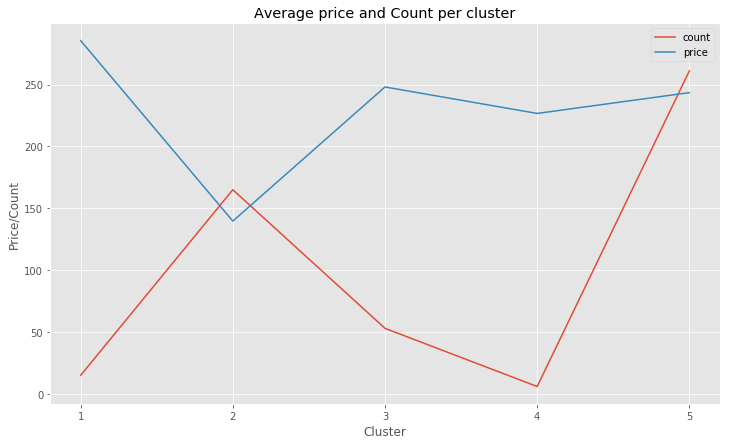

In [40]:
group_count = manhattan_merged.groupby('Cluster Labels').count().reset_index()
group_count = group_count[["Cluster Labels","name"]]
group_mean = manhattan_merged.groupby('Cluster Labels').mean().reset_index()
group_mean = group_mean[["Cluster Labels","price"]]

cluster_group = group_count.join(group_mean.set_index('Cluster Labels'), on = "Cluster Labels")
cluster_group.set_index('Cluster Labels',inplace=True)
cluster_group.rename(columns={'name': 'count'}, inplace=True)
cluster_group.index = range(1,len(cluster_group)+1)
#cluster_group

cluster_group.plot(kind='line',figsize=(12,7))
plt.title('Average price and Count per cluster')
plt.ylabel('Price/Count')
plt.xlabel('Cluster')
plt.xticks(cluster_group.index)
#plt.figure(figsize=(12,7))

plt.show()



## 5. Results and Discussion <a name="results"></a>


Now that we are done with our comprehensive and thorough study of the *Airbnb* dataset we get a very holistic idea about the properties and listings of Airbnb for the city of New York.

We had done some **exploratory data analysis** and performed a **clustering activity** based on venues nearby to the properties.

The results we get from our *exploratory data analyis* are as follows:
* In case of **boroughs**, Manhattan followed by Brooklyn have the most number of listings. Also with respect to price the properties in Manhattan tend to have higher price, thus soliciting the fact that Manhattan is the urban core of New York
* The above result about boroughs was strengthened by our study of **neighborhood** with respect to average price of listings. We noticed the most concentration of high priced neighborhoods in Manhattan
* Studying the **types of rooms** we observed that the with respect to numbers the *shared rooms* were the least and with respect to price the *entire home/apartment* were the highest. This reinforces the fact that most of the guests prefer privacy rather than sharing. Also it highlights the obvious fact that rooms will be cheaper than entire homes or apartments
* Most of the properties are available for booking for **minimum nights** of a day or a week.
* For **availability across the year**, we observe most properties either available throughout the year or available for just a day or a week, thus giving us a better idea about the destination type properties being offered by Airbnb
* From the wordcloud of the **names** of all the listings, we were able to observe that the most popular listings were for **_Private Rooms in Manhattan_**

For the *clustering activity* we divided the properties basis nearby venues into 5 clusters and conducted a comprehensive study of the listings for each cluster, trying to explain the count and average price of the properties per cluster.



## 6. Conclusion <a name="conclusion"></a>


The purpose of this project was to conduct an exploratory data analysis on the listings of Airbnb for the city of New York. This was done by comparing the various independant parameters to the price and number of listings, and trying to establish logical explanations and valid justifications of the results observed.

Also we did a cluster analysis type study on the listings with respect to their most common nearby venues. We tried to explain how each of the cluster justified its corresponding average price of listings and also its popularity basis the number of listings pertaining to each such clusters.

With these observations, stakeholders can plan accordingly with regards to more optimal pricing of the listings. It also does help understand the preferences and choices of both guests' and hosts' which will definitely help with maybe implementing additional services or also to guid marketing initiatives.